## Module 5 : Financial planning

# Part 1

In [44]:
# importing libraries

In [45]:
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [46]:
# loading .env environment

In [47]:
load_dotenv()

True

## Evaluate cryptocurrency Wallet by Using the Requests Library

In [48]:
# setting current amount of crypto assets respectively

In [49]:
my_btc = 1.2
my_eth = 5.3

In [50]:
# declare URL variables

In [51]:
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [52]:
# checking and making sure requests function did work

In [53]:
response_btc = requests.get(btc_url).json()
print(json.dumps(response_btc, indent = 4))


{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19068125,
            "total_supply": 19068125,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 21263.0,
                    "volume_24h": 41680791033,
                    "market_cap": 394663608853,
                    "percentage_change_1h": 2.91091541862632,
                    "percentage_change_24h": -3.66930471201588,
                    "percentage_change_7d": -31.9906764242545,
                    "percent_change_1h": 2.91091541862632,
                    "percent_change_24h": -3.66930471201588,
                    "percent_change_7d": -31.9906764242545
                },
                "CAD": {
                    "price": 27482.4275,
                    "volume_24h": 53872422410.1525,
                    "

In [54]:
btc_value = response_btc["data"]["1"]["quotes"]["CAD"]["price"]
btc_value

27482.4275

In [55]:
response_eth = requests.get(eth_url).json()
print(json.dumps(response_eth, indent = 4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 121180121,
            "total_supply": 121180121,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 1117.18,
                    "volume_24h": 28097281325,
                    "market_cap": 131235244490,
                    "percentage_change_1h": 5.4409288664251,
                    "percentage_change_24h": -4.98034933995685,
                    "percentage_change_7d": -38.5619715128769,
                    "percent_change_1h": 5.4409288664251,
                    "percent_change_24h": -4.98034933995685,
                    "percent_change_7d": -38.5619715128769
                },
                "CAD": {
                    "price": 1443.95515,
                    "volume_24h": 36315736112.5625,
                    

In [56]:
eth_value = response_eth["data"]["1027"]["quotes"]["CAD"]["price"]
eth_value

1443.95515

In [57]:
total_btc = my_btc*btc_value
total_eth = my_eth*eth_value

In [58]:
total_btc

32978.913

In [59]:
total_eth

7652.962294999999

In [60]:
total_wallet = total_btc+total_eth
total_wallet

40631.875295

In [61]:
print(f"The current value of your {my_btc} BTC is ${total_btc}")
print(f"The current value of your {my_eth} ETH is ${total_eth}")

The current value of your 1.2 BTC is $32978.913
The current value of your 5.3 ETH is $7652.962294999999


## Evaluate the stock and Bond Holdings by using Alpaca SDK

In [62]:
my_agg = 200
my_spy = 50

In [63]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [64]:
timeframe = "1Day"

start_date = pd.Timestamp("2019-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2019-08-07", tz="America/New_York").isoformat()

tickers= ["AGG","SPY"]

df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_ticker.tail()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2019-08-07 04:00:00+00:00,113.17,113.29,112.61,112.68,9156551,37550,112.959111,AGG
2019-08-07 04:00:00+00:00,284.40,288.82,282.04,287.97,143723012,668446,286.311024,SPY


In [65]:
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis = 1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis = 1)

df_ticker = pd.concat([AGG,SPY], axis =1 , keys =["AGG","SPY"])
df_ticker.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2019-08-07 04:00:00+00:00  113.17  113.29  112.61  112.68  9156551   

                                                     SPY                  \
                          trade_count        vwap   open    high     low   
timestamp                                                                  
2019-08-07 04:00:00+00:00       37550  112.959111  284.4  288.82  282.04   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2019-08-07 04:00:00+00:00  287.97  143723012      668446  286.311024

In [66]:
agg_close_price = float(df_ticker["AGG"]["close"])
spy_close_price = float(df_ticker["SPY"]["close"])

In [67]:
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $112.68
Current SPY closing price: $287.97


In [68]:
value_agg = my_agg * agg_close_price 
value_spy = my_spy * spy_close_price

print(f"The current value of your {my_agg} AGG shares is ${value_agg}")
print(f"The current value of your {my_spy} SPY shares is ${value_spy}")

The current value of your 200 AGG shares is $22536.0
The current value of your 50 SPY shares is $14398.500000000002


## Evaluate the emergency funds

In [69]:
monthly_income = 12000

In [70]:
data_savings = {
    "crypto":[31434,7068]
}

tickers = ["BTC", "ETH"]

df_savings = pd.DataFrame(data_savings, index=tickers)
df_savings

,crypto
BTC,31434
ETH,7068


<AxesSubplot:ylabel='crypto'>

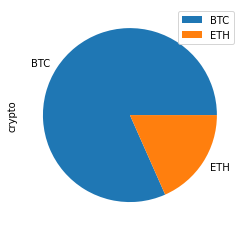

In [71]:
df_savings.plot.pie(y="crypto")

In [72]:
## 4.present if statement 

# Part 2 

In [74]:
timeframe = "1Day"


start_date_2 = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date_2 = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

tickers_2= ["AGG","SPY"]

df_ticker_2 = api.get_bars(
    tickers_2,
    timeframe,
    start=start_date_2,
    end=end_date_2
).df

df_ticker_2.head()


AGG = df_ticker_2[df_ticker_2['symbol']=='AGG'].drop('symbol', axis = 1)
SPY = df_ticker_2[df_ticker_2['symbol']=='SPY'].drop('symbol', axis = 1)

df_ticker_2 = pd.concat([AGG,SPY], axis =1 , keys =["AGG","SPY"])
df_ticker_2.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [92]:
MC_thirtyyear = MCSimulation(
    portfolio_data = df_ticker_2,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [93]:
MC_thirtyyear.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [94]:
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/asanyusuf/Desktop/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005014,0.993044,0.984516,1.006633,0.987240,1.002965,1.000232,0.989844,0.985614,1.003686,...,1.003556,0.991666,1.008997,1.000362,1.010532,1.006978,1.004724,1.014108,1.009220,1.005473
2,1.003080,0.978751,0.985878,1.003218,0.979879,1.007293,1.012099,0.978119,0.971996,1.010571,...,1.009626,0.993540,1.005710,1.002238,1.017390,1.006667,0.997746,1.019454,1.011145,1.005228
3,1.010196,0.977559,0.985369,0.999848,0.976774,1.009656,1.025245,0.977379,0.973953,1.000677,...,1.017483,1.001341,1.003608,0.996661,1.014014,1.012152,1.011918,1.010570,1.002813,1.014369
4,1.024219,0.985697,0.995441,0.986995,0.978858,1.009169,1.025201,0.989039,0.953042,0.994825,...,1.017953,1.007281,1.015925,0.994748,0.998412,1.015346,1.010031,1.014362,1.001713,1.020068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.514742,15.829652,16.920294,3.914707,25.458951,14.646279,74.552084,7.782522,12.854913,3.473669,...,41.080705,37.940127,6.532733,9.463073,20.820365,31.286332,21.493653,21.778105,18.715175,15.003561
7557,14.618343,15.609472,16.735948,3.890165,25.687998,14.811359,74.700945,7.862481,12.806049,3.496464,...,40.999994,38.393560,6.539525,9.467051,20.725031,31.359789,21.674245,21.651090,18.785638,15.056482
7558,14.794642,15.597819,16.669166,3.914115,25.875836,14.813222,74.174909,7.955095,12.793164,3.527637,...,40.720653,38.390160,6.567377,9.490758,20.798957,31.753750,21.789263,21.565736,18.840631,15.074539
7559,14.859875,15.630511,16.509120,3.864477,25.998487,14.777690,73.404849,7.963640,12.948414,3.550271,...,41.024938,38.300105,6.544047,9.539803,20.899629,32.271730,21.708755,21.079926,18.933189,15.084612


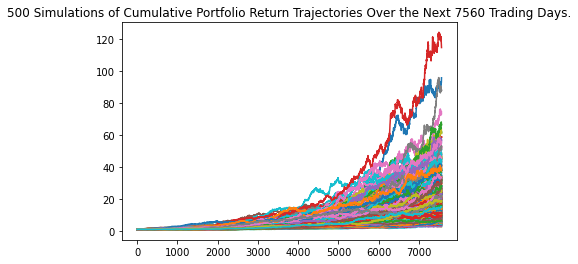

In [95]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

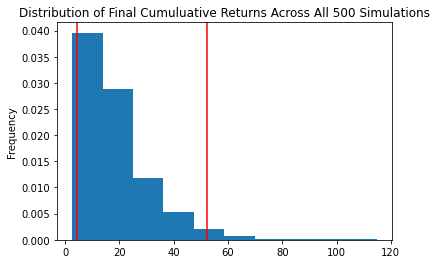

In [97]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png',bbox_inches='tight')

In [98]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             18.942297
std              13.620363
min               2.591700
25%               9.698561
50%              15.132665
75%              23.888311
max             114.730955
95% CI Lower      4.550948
95% CI Upper     52.239790
Name: 7560, dtype: float64


In [99]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000 investments in AGG and SPY.
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next 5 years will end within in the range of $91018.95 and $1044795.8


In [100]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000 investments in AGG and SPY.
ci_lower_2 = round(tbl[8]*30000,2)
ci_upper_2 = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $30,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_2} and ${ci_upper_2}")

There is a 95% chance that an initial investment of $30,000 in the portfolio over the next 5 years will end within in the range of $136528.43 and $1567193.7


In [101]:
MC_tenyear = MCSimulation(
    portfolio_data = df_ticker_2,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [102]:
MC_tenyear.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [103]:
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/asanyusuf/Desktop/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013326,0.987452,1.008277,1.003575,0.987649,0.993871,0.999288,0.989652,1.001196,0.999431,...,0.989601,0.990932,0.996835,0.996864,0.995983,0.986779,1.012555,0.993271,0.994605,1.005292
2,1.018185,0.986009,1.020540,1.010805,1.005222,0.976037,1.007351,0.989716,1.013027,1.017632,...,1.005325,0.993574,0.982572,0.985349,1.004014,0.986118,1.015939,0.992593,0.995723,1.005292
3,1.032307,0.995465,1.019978,1.025244,1.012022,0.976249,1.007164,0.981300,1.003825,1.019760,...,1.026939,1.006039,0.966797,0.964020,1.004872,0.978385,1.013360,0.994346,0.994957,1.013724
4,1.021915,1.008183,1.031144,1.025944,1.012838,0.982425,1.028360,0.980303,0.999752,1.018009,...,1.020390,1.014768,0.965594,0.966758,1.004745,0.988294,1.011154,0.997838,0.999340,1.019274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.942670,2.240801,2.252338,3.417935,2.551573,1.588543,3.290247,3.679575,2.212652,5.722081,...,3.527341,2.211139,1.729229,5.603571,2.646535,8.433147,2.233599,1.318955,2.102960,5.443909
2517,2.920860,2.259791,2.249807,3.422295,2.561843,1.610540,3.309047,3.678719,2.234451,5.815739,...,3.573959,2.214137,1.723772,5.595628,2.596252,8.391221,2.265171,1.298114,2.122316,5.534221
2518,2.939340,2.260128,2.246520,3.442949,2.565352,1.592381,3.289795,3.708669,2.229480,5.769835,...,3.533459,2.261728,1.706755,5.573587,2.609485,8.413708,2.253478,1.297781,2.123821,5.588824
2519,2.909336,2.274240,2.243567,3.402353,2.576247,1.594535,3.262039,3.651967,2.201291,5.746610,...,3.616068,2.308397,1.731593,5.601514,2.615006,8.345841,2.246891,1.285206,2.182912,5.577002


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

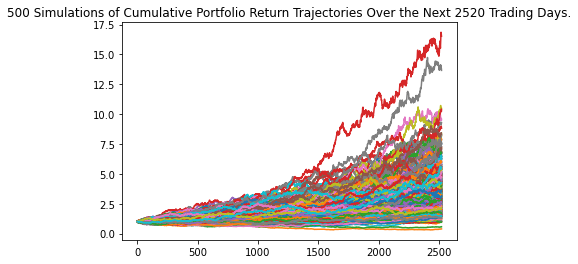

In [104]:
MC_tenyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

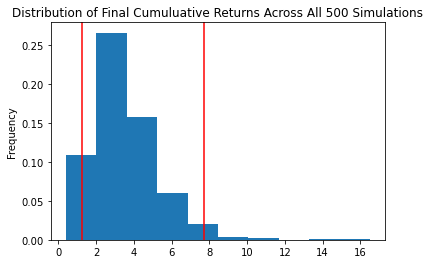

In [105]:
MC_tenyear.plot_distribution()

In [106]:
tbl_2 = MC_tenyear.summarize_cumulative_return()
print(tbl_2)

count           500.000000
mean              3.557856
std               1.801324
min               0.395412
25%               2.317648
50%               3.201113
75%               4.428961
max              16.524867
95% CI Lower      1.271032
95% CI Upper      7.726441
Name: 2520, dtype: float64


In [108]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $12,000 investments
ci_lower_3 = round(tbl_2[8]*12000,2)
ci_upper_3 = round(tbl_2[9]*12000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $12,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_3} and ${ci_upper_3}.")

There is a 95% chance that an initial investment of $12,000 in the portfolio over the next 5 years will end within in the range of $15252.39 and $92717.29.


## weighting the portfolio more heavilly toward stocks will not allow the credit union members to retuire after only 10 years.